- make a classifier network that is as similar as possible to the umap subclass

In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [3]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if len(gpu_devices)>0:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
print(gpu_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Load packages

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
from IPython import display
import pandas as pd
import umap
import copy
import os, tempfile
from datetime import datetime


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Load dataset

In [5]:
from tfumap.load_datasets import load_MOONS, mask_labels

In [6]:
X_train, X_test, X_valid, Y_train, Y_test, Y_valid = load_MOONS(noise= 0.1, random_state = 1)

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X_train, Y_train = make_blobs(n_samples = 1000, n_features = 2, random_state = 1)
np.unique(Y_train)

array([0, 1, 2])

In [9]:
def norm(x): 
    return (x - np.min(x)) / (np.max(x) - np.min(x))
X_train = norm(X_train)

In [10]:
labels_per_class = 3
X_labeled, Y_labeled, Y_masked = mask_labels(X_train, Y_train, labels_per_class = labels_per_class)

(1000, 9, 1000)

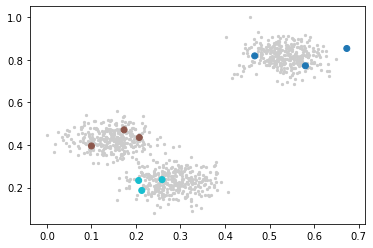

In [11]:
plt.scatter(X_train[:,0], X_train[:,1], color='#CCCCCC', s=5)
plt.scatter(X_labeled[:,0], X_labeled[:,1], c=Y_labeled, cmap = plt.cm.tab10)
len(X_train), len(X_labeled), len(X_valid)

In [12]:
from umap import UMAP

In [13]:
embedder = UMAP()
z_train = embedder.fit_transform(X_train)
z_labeled = embedder.transform(X_labeled)

(1000, 9, 1000)

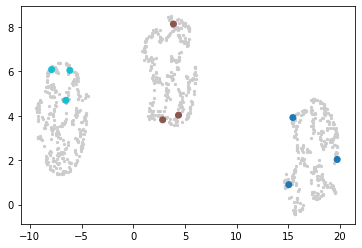

In [14]:
plt.scatter(z_train[:,0], z_train[:,1], color='#CCCCCC', s=5)
plt.scatter(z_labeled[:,0], z_labeled[:,1], c=Y_labeled, cmap = plt.cm.tab10)
len(X_train), len(X_labeled), len(X_valid)

### add noise

In [15]:
n_dims = 50
train_noise = np.random.uniform(-1, 1, size=(len(X_train), n_dims))
label_noise = np.random.uniform(-1, 1, size=(len(X_labeled), n_dims))
X_train = np.concatenate([X_train[:,:2], train_noise], axis=1)
X_labeled = np.concatenate([X_labeled[:,:2], label_noise], axis=1)

In [16]:
from umap import UMAP

In [17]:
embedder = UMAP()
emb = embedder.fit_transform(np.vstack([X_train, X_labeled]))
z_train = emb[:len(X_train)]
z_labeled = emb[len(X_train):]

(1000, 9, 1000)

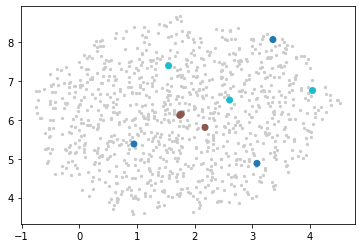

In [18]:
plt.scatter(z_train[:,0], z_train[:,1], color='#CCCCCC', s=5)
plt.scatter(z_labeled[:,0], z_labeled[:,1], c=Y_labeled, cmap = plt.cm.tab10)
len(X_train), len(X_labeled), len(X_valid)

### LDA on data

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
clf = LinearDiscriminantAnalysis(n_components=2)

In [21]:
clf.fit(X_labeled, Y_labeled)

LinearDiscriminantAnalysis(n_components=2)

In [22]:
lda_train = clf.transform(X_train)
lda_labeled = clf.transform(X_labeled)

In [23]:
lda_train.shape

(1000, 2)

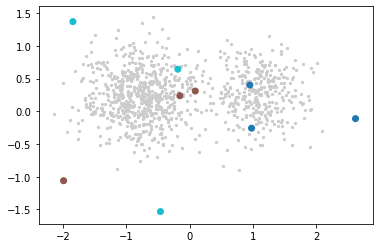

In [24]:
plt.scatter(lda_train[:,0], lda_train[:,1], color='#CCCCCC', s=5)
plt.scatter(lda_labeled[:,0], lda_labeled[:,1], c=Y_labeled, cmap = plt.cm.tab10)